In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

In [32]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255
X_test = test_data.values/255

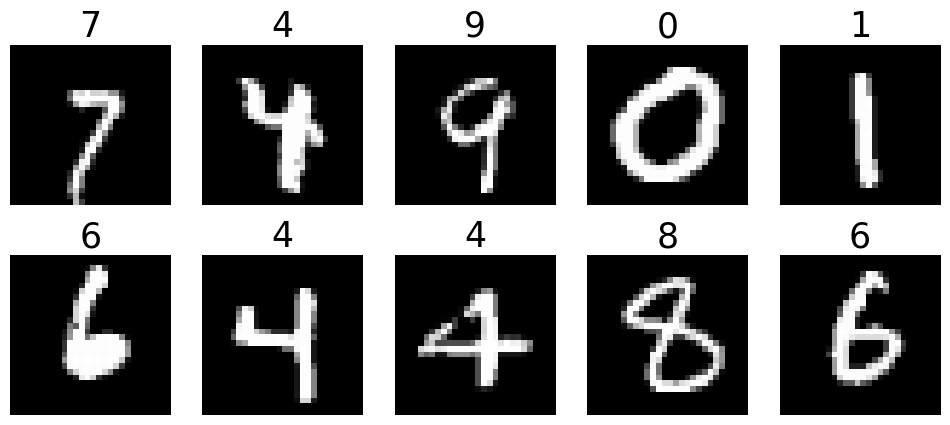

In [33]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [34]:
def relu(x):
    x[x<0]=0
    return x

In [35]:
def h(X,W,b):

    a1 = X

    z1 = np.matmul(X, W[0]) + b[0]
    
    a2 = relu(z1)

    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total

    return sigma

In [36]:
def softmax(X_in,weights):
    
    s = np.exp(np.matmul(X_in,weights))
    total = np.sum(s, axis=1).reshape(-1,1)
    return s / total

In [37]:
def loss(y_pred,y_true):

    global K 
    K = 10
    N = len(y_true)

    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)

    return -np.mean(loss_sample)

In [38]:
def backprop(W,b,X,y,alpha=1e-4):

    K = 10
    N = X.shape[0]
    
    a1 = X

    z1 = np.matmul(X, W[0]) + b[0]

    a2 = relu(z1)

    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    delta2 = (sigma - y_one_hot_vec)
    grad_W1 = np.matmul(a2.T, delta2)
    
    delta1 = np.matmul(delta2, W[1].T)*(z1>0)
    grad_W0 = np.matmul(X.T, delta1)
    
    dW = [grad_W0/N + alpha*W[0], grad_W1/N + alpha*W[1]]
    db = [np.mean(delta1, axis=0)]

    return dW, db

In [39]:
eta = 5e-1
alpha = 1e-6 
gamma = 0.99 
eps = 1e-3 
num_iter = 2000 
n_H = 256 
n = X_train.shape[1]
K = 10

In [40]:

np.random.seed(1127)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

In [41]:
%%time
gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = backprop(W,b,X_train,y_train,alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(db[0]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 500 == 0:
        y_pred = h(X_train,W,b)
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        
        print("gW0={:.4f} gW1={:.4f} gb0={:.4f}\netaW0={:.4f} etaW1={:.4f} etab0={:.4f}"
              .format(gW0, gW1, gb0, etaW0, etaW1, etab0))
        
        print("|dW0|={:.5f} |dW1|={:.5f} |db0|={:.5f}"
             .format(np.linalg.norm(dW[0]), np.linalg.norm(dW[1]), np.linalg.norm(db[0])), "\n")
        
        gW0 = gW1 = gb0 = 1

y_pred_final = h(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))

Cross-entropy loss after 1 iterations is 7.3264114
Training accuracy after 1 iterations is 37.3524%
gW0=1.0715 gW1=1.2174 gb0=0.9919
etaW0=0.4828 etaW1=0.4530 etab0=0.5018
|dW0|=2.85527 |dW1|=4.76880 |db0|=0.43260 

Cross-entropy loss after 501 iterations is 0.077221224
Training accuracy after 501 iterations is 97.8333%
gW0=0.1288 gW1=0.0487 gb0=0.0095
etaW0=1.3878 etaW1=2.2437 etab0=4.8738
|dW0|=0.01327 |dW1|=0.00698 |db0|=0.00108 

Cross-entropy loss after 1001 iterations is 0.053528822
Training accuracy after 1001 iterations is 98.5405%
gW0=0.1640 gW1=0.0330 gb0=0.0101
etaW0=1.2308 etaW1=2.7135 etab0=4.7465
|dW0|=0.01255 |dW1|=0.00551 |db0|=0.00111 

Cross-entropy loss after 1501 iterations is 0.029436113
Training accuracy after 1501 iterations is 99.3214%
gW0=0.0921 gW1=0.0295 gb0=0.0088
etaW0=1.6389 etaW1=2.8645 etab0=5.0563
|dW0|=0.00740 |dW1|=0.00349 |db0|=0.00058 

Final cross-entropy loss is 0.031026679
Final training accuracy is 99.2357%
Wall time: 13min 27s


In [42]:

y_pred_test = np.argmax(h(X_test,W,b), axis=1)

In [43]:
submission = pd.DataFrame({'ImageId': range(1,len(X_test)+1) ,'Label': y_pred_test })
submission.to_csv("simplemnist_result.csv",index=False)